In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

### Reading [Threads, an Instagram app Reviews](https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews) Dataset

##### INITIALIZE DF (load data)

In [46]:
df = pd.read_csv('threads_reviews.csv')

In [47]:
df.shape

(32910, 4)

In [48]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


#### Preprocessing

In [49]:
Data = df[['source', 'review_description', 'rating']]

In [50]:
Data.shape

(32910, 3)

In [51]:
Data.columns

Index(['source', 'review_description', 'rating'], dtype='object')

In [52]:
Data.head()

,source,review_description,rating
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2
1,Google Play,Pretty good for a first launch!! Its easy to u...,3
2,Google Play,"For a brand new app, it's very well optimized....",3
3,Google Play,"Great app with a lot of potential! However, th...",3
4,Google Play,"The app is good, but it needs a lot of functio...",3


In [53]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 771.5+ KB


### Tokenization

In [54]:
print(Data['review_description'][0])

Meh. Not the greatest experience on a Chromebook. Seems to be customized for phones only. Opens in a little screen that you can't expand or resize - for reasons that are a complete mystery to me. Judging from the fact that every other app I know of is resizeable, this seems like it was a conscious choice by the developers . Why you'd do something like this is beyond understanding and suggests a control freak approach. Not a great way to make a first impression.


In [55]:
# #Приклад токенізації 1-ого рядка стовпчика 'review_description' нашого датасету
words = word_tokenize(Data['review_description'][0])
words

['Meh',
 '.',
 'Not',
 'the',
 'greatest',
 'experience',
 'on',
 'a',
 'Chromebook',
 '.',
 'Seems',
 'to',
 'be',
 'customized',
 'for',
 'phones',
 'only',
 '.',
 'Opens',
 'in',
 'a',
 'little',
 'screen',
 'that',
 'you',
 'ca',
 "n't",
 'expand',
 'or',
 'resize',
 '-',
 'for',
 'reasons',
 'that',
 'are',
 'a',
 'complete',
 'mystery',
 'to',
 'me',
 '.',
 'Judging',
 'from',
 'the',
 'fact',
 'that',
 'every',
 'other',
 'app',
 'I',
 'know',
 'of',
 'is',
 'resizeable',
 ',',
 'this',
 'seems',
 'like',
 'it',
 'was',
 'a',
 'conscious',
 'choice',
 'by',
 'the',
 'developers',
 '.',
 'Why',
 'you',
 "'d",
 'do',
 'something',
 'like',
 'this',
 'is',
 'beyond',
 'understanding',
 'and',
 'suggests',
 'a',
 'control',
 'freak',
 'approach',
 '.',
 'Not',
 'a',
 'great',
 'way',
 'to',
 'make',
 'a',
 'first',
 'impression',
 '.']

#### Stop words filtration & remove punctuations

In [56]:
def clean_text(text): 
    text = str(text) # Конвертація вхідного тексту у строку
    text = text.lower() #Перетворення тексту у нижній регістр
    text = re.sub("\d", " ", text) #Видалення всіх цифр з тексту та заміна їх на пробіли
    text = re.sub("@\S+", " ", text) #Видалення слів, які починаються з символу "@" та заміна їх на пробіли
    text = re.sub("https*\S+", " ", text) #Видалення посилань та заміна на пробіли
    text = re.sub("#\S+", " ", text) #Видалення слів, які починаються з символу "#"
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) #Видалення всіх знаків пунктуації
    text = re.sub('\n', ' ', text) #Видалення символів нового рядка
    text = re.sub('\s{2,}',' ', text)  #Заміна двох або більше пробілів на один
    stop_words = stopwords.words("english") #Створення списку стоп-слів для англ. мови за допомогою бібліотеки nltk
    text = ' '.join([word for word in text.split(' ') if word not in stop_words]) #Розбиття тексту на слова, видалення стоп-слів і з'єднання залишених слів назад в текст
    return text

In [57]:
Data['review_description'] = [clean_text(review) for review in Data['review_description']]
Data

/var/folders/xt/440j2mx17xl6dm2g96ypkr180000gn/T/ipykernel_57874/4102819939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['review_description'] = [clean_text(review) for review in Data['review_description']]


,source,review_description,rating
0,Google Play,meh greatest experience chromebook seems custo...,2
1,Google Play,pretty good first launch easy use self explana...,3
2,Google Play,brand new app well optimized however missing q...,3
3,Google Play,great app lot potential however lot needs fixe...,3
4,Google Play,app good needs lot functionality example searc...,3
...,...,...,...
32905,App Store,killed dog mark zuckerburg strangled dog gone,1
32906,App Store,add search hashtag like twitter,1
32907,App Store,bad twister,1
32908,App Store,yet another trash meta,1


### Visualization with Wordcloud

Створення графічного представлення хмари слів - Wordcloud, де слова, які зустрічаються частіше, будуть відображатися більшим шрифтом, а ті, які рідше, - меншим шрифтом.

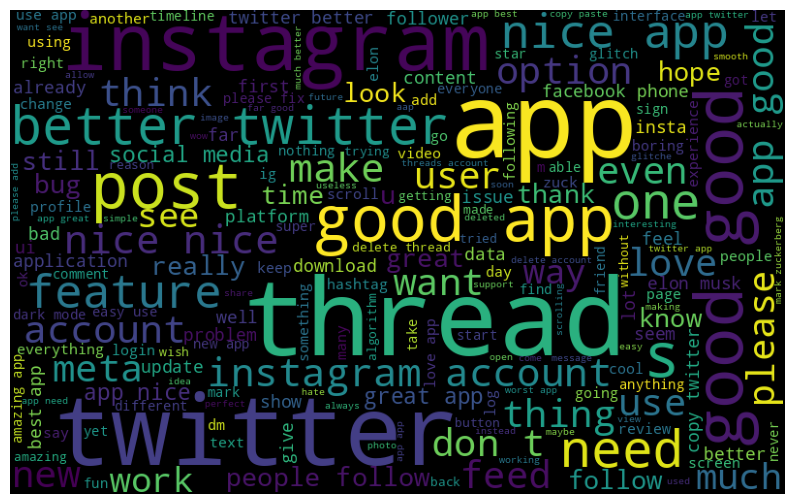

In [58]:
words = ' '.join([text for text in Data['review_description']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

### Vectorization with TFIDF

Класифікація текстових даних за допомогою TF-IDF (Term Frequency-Inverse Document Frequency) відбувається у декілька етапів: спочатку здійснюється перетворення текстових даних у числові вектори, далі - навчання моделі, після чого - використання навченої TF-IDF матриці для тренування моделі класифікації, в нашому випадку - логістичної регресії.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Data['review_description'], Data['source'], test_size=0.30)
tfidf_vectorizer = TfidfVectorizer(max_df=1000, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=400).fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   App Store       0.94      0.34      0.50       746
 Google Play       0.95      1.00      0.97      9127

    accuracy                           0.95      9873
   macro avg       0.94      0.67      0.74      9873
weighted avg       0.95      0.95      0.94      9873



Precision (точність):  
* при 0.0 - %TP, вказує на низьку\високу точність, модель має низьку\високу кількість хибно позитивних. <br>
* при 1.0 - %TP, вказує на те, що модель має менше\більше хибно позитивних для цього класу. <br>

Recall (чутливість): 
* при 0.0 - %TP, вказує на низьку\високу чутливість моделі для класу 0.0.
* при 1.0 - %TP, вказує на меншу\більшу чутливість для класу 1.0.

F1-Score (F1-показник) є гармонічним середнім точності та чутливості:
* при 0.0 - вказує на погану\добру якість моделі для класу 0.0.
* при 1.0 - вказує на те, що модель може бути менш\більш ефективною у класифікації цього класу.

Support: кількість прикладів у кожному класі у тестовому наборі даних.

Accuracy (точність): загальна точність моделі, яка вказує на те, наскільки часто модель правильно класифікує приклади.

Macro Avg: середнє значення метрик для всіх класів. В нашому випадку, середнє значення точності, чутливості і F1-показника для всіх класів.

Weighted Avg: середнє значення метрик для всіх класів, де кожен клас зважується на підтримку (кількість прикладів) відповідного класу.